# 2. Cross Validation & Model Selection

## Visualizing cross-validation behavior in scikit-learn

### Choosing the right cross-validation object is a crucial part of fitting a model properly. There are many ways to split data into training and test sets in order to avoid model overfitting, to standardize the number of groups in test sets, etc. This example visualizes the behavior of several common scikit-learn objects for comparison.

In [5]:
%reset -f

In [1]:
from sklearn.model_selection import (
    TimeSeriesSplit,
    KFold,
    ShuffleSplit,
    StratifiedKFold,
    GroupShuffleSplit,
    GroupKFold,
    StratifiedShuffleSplit,
    #StratifiedGroupKFold,
)

from matplotlib.patches import Patch

import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import pandas            as pd

In [2]:
rng = np.random.RandomState(0)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

In [3]:
sns.set_style('darkgrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure',figsize=(10, 6))

# Visualise Data

### First, we must understand the structure of our data. It has 100 randomly generated input datapoints, 3 classes split unevenly across datapoints, and 10 "groups" split evenly across datapoints.

### As we'll see, some cross-validation objects do specific things with labeled data, others behave differently with grouped data, and others do not use this information. 

### To begin, lets visualise the data

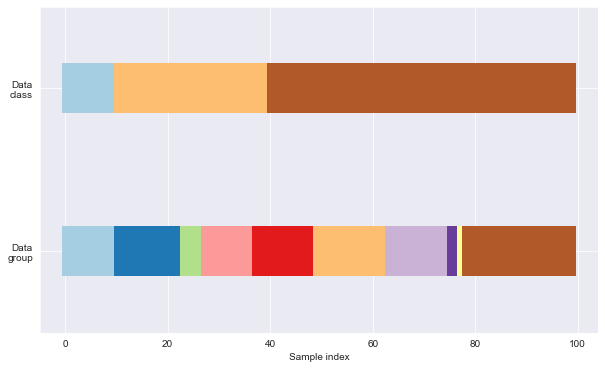

In [4]:
# Generate the class/group data
n_points = 100
X = rng.randn(100, 10)

percentiles_classes = [0.1, 0.3, 0.6]
y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

# Generate uneven groups
group_prior = rng.dirichlet([2] * 10)
groups = np.repeat(np.arange(10), rng.multinomial(100, group_prior))


def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=["Data\ngroup", "Data\nclass"],
        xlabel="Sample index",
    )


visualize_groups(y, groups, "no groups")

### Define a function to visualise cross-validation behavior

### We'll define a funciton that lets us visualise the behavior of each cross-validation object. We'll perform 4 splits of the data. On each split, we'll Visualise the indices chosen for the training set (in blue) and the test set (in red).

In [5]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax

### Let's see how it looks for the :class:~sklearn.model_selection.KFold cross-validation object:

<AxesSubplot:title={'center':'KFold'}, xlabel='Sample index', ylabel='CV iteration'>

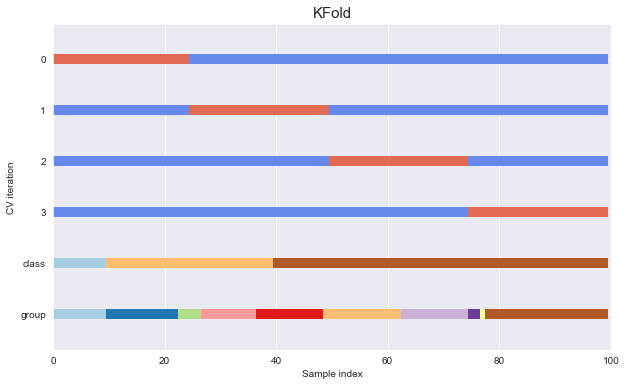

In [7]:
fig, ax = plt.subplots()
cv = KFold(n_splits)
plot_cv_indices(cv, X, y, groups, ax, n_splits)

### As you can see, by default the KFold cross-validation iterator does not take either datapoint class or group into consideration. We can change this by using either:
#### - StratifiedKFold to preserve the percentage of samples for each class.
#### - GroupKFold to ensure that the same group will not appear in two different folds.
#### - StratifiedGroupKFold to keep the constraint of GroupKFold while attempting to return stratified folds.

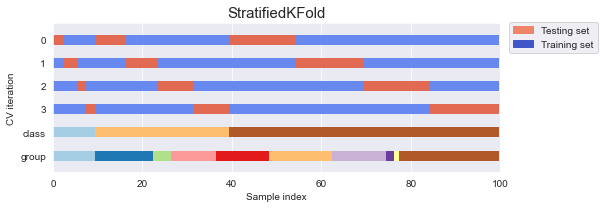

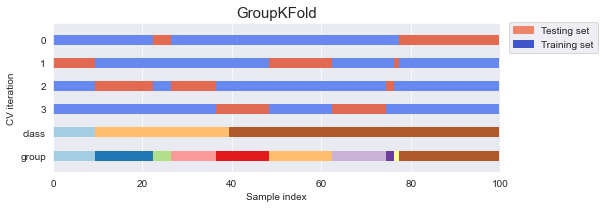

In [11]:
# cvs = [StratifiedKFold, GroupKFold, StratifiedGroupKFold]
# above removed because StratifiedGroupKFold cannot be loaded in this environment

cvs = [StratifiedKFold, GroupKFold]

for cv in cvs:
    fig, ax = plt.subplots(figsize=(10, 3))
    plot_cv_indices(cv(n_splits), X, y, groups, ax, n_splits)
    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)

### Next we'll visualize this behavior for a number of CV iterators.
### Visualize cross-validation indices for many CV objects
#### Let's visually compare the cross validation behavior for many scikit-learn cross-validation objects. Below we will loop through several common cross-validation objects, visualizing the behavior of each.
#### Note how some use the group/class information while others do not.

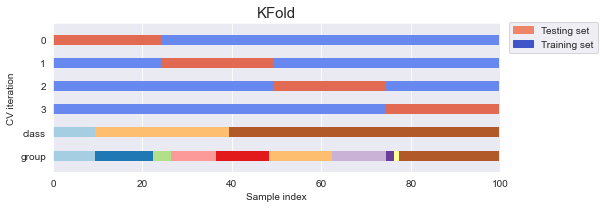

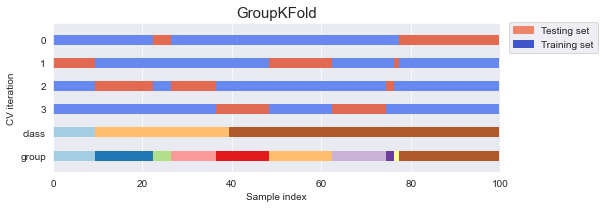

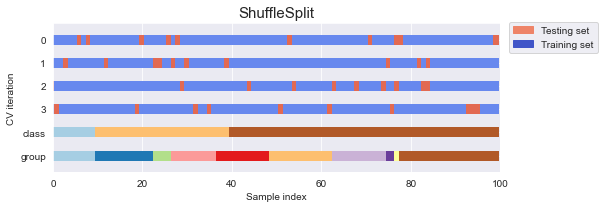

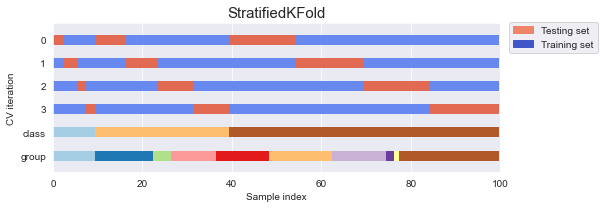

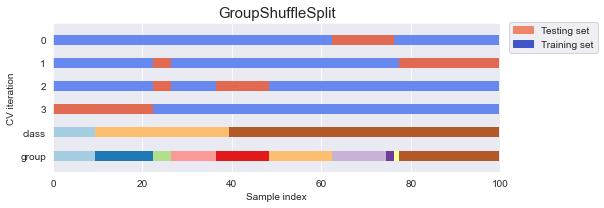

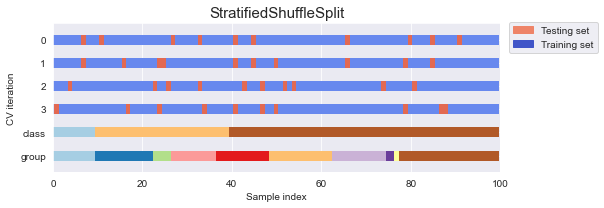

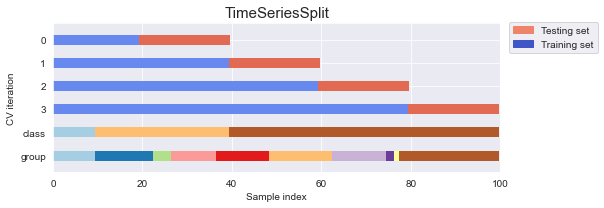

In [12]:
# note that StratifiedGroupKFold has been removed from cvs because it cannot be loaded in this environment
  
cvs = [
    KFold,
    GroupKFold,
    ShuffleSplit,
    StratifiedKFold,
    GroupShuffleSplit,
    StratifiedShuffleSplit,
    TimeSeriesSplit,
]

for cv in cvs:
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(10, 3))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )
    # Make the legend fit
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)
plt.show()